In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
sns.set()

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.metrics import mean_squared_error, r2_score

import tensorflow as tf
import keras
from tensorflow.keras import layers

# Loading & preprocessing the training data

In [2]:
df_train = pd.read_csv('DailyDelhiClimateTrain.csv')
df_train

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000


In [3]:
len(df_train)

1462

In [4]:
Xtrain = df_train['meantemp'].values

In [5]:
scaler  = MinMaxScaler(feature_range = (0, 1))
Xtrain_sc = scaler.fit_transform(Xtrain.reshape(-1, 1))
Xtrain_sc.shape


(1462, 1)

In [6]:
Xtrain_f = []
Ytrain_f = []
time_step = 60

for i in range(time_step, len(Xtrain_sc)):
    Xtrain_f.append(Xtrain_sc[i - time_step:i, 0])
    Ytrain_f.append(Xtrain_sc[i, 0])
    
Xtrain_f = np.array(Xtrain_f)
Ytrain_f = np.array(Ytrain_f)

In [7]:
Xtrain_f = Xtrain_f.reshape(Xtrain_f.shape[0], Xtrain_f.shape[1], 1)
Xtrain_f.shape

(1402, 60, 1)

# Model building

In [8]:
model = keras.Sequential([
    layers.LSTM(units = 50, return_sequences = True, input_shape = (Xtrain_f.shape[1], 1)),
    layers.LSTM(units = 50),
    layers.Dense(units = 25),
    layers.Dense(units = 1)
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 25)                1275      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 31,901
Trainable params: 31,901
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [10]:
hist = model.fit(Xtrain_f, Ytrain_f, epochs = 30, batch_size = 32)

Epoch 1/30
44/44 [==============================] - 22s 54ms/step - loss: 0.0313
Epoch 2/30
44/44 [==============================] - 2s 51ms/step - loss: 0.0060
Epoch 3/30
44/44 [==============================] - 3s 59ms/step - loss: 0.0051
Epoch 4/30
44/44 [==============================] - 2s 49ms/step - loss: 0.0050
Epoch 5/30
44/44 [==============================] - 2s 48ms/step - loss: 0.0049
Epoch 6/30
44/44 [==============================] - 2s 50ms/step - loss: 0.0046
Epoch 7/30
44/44 [==============================] - 2s 51ms/step - loss: 0.0045
Epoch 8/30
44/44 [==============================] - 2s 52ms/step - loss: 0.0044
Epoch 9/30
44/44 [==============================] - 3s 60ms/step - loss: 0.0043
Epoch 10/30
44/44 [==============================] - 2s 55ms/step - loss: 0.0042
Epoch 11/30
44/44 [==============================] - 2s 50ms/step - loss: 0.0042
Epoch 12/30
44/44 [==============================] - 2s 56ms/step - loss: 0.0044
Epoch 13/30
44/44 [=================

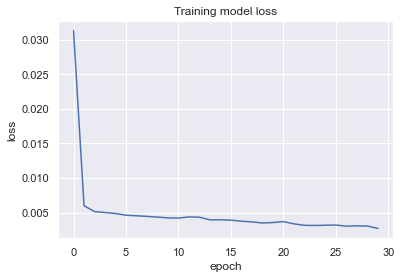

In [11]:
train_loss = hist.history['loss']
epochs = range(30)
plt.plot(epochs, train_loss)
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

# Predicting the training data

In [12]:
Ytrain_pred = model.predict(Xtrain_f)

44/44 [==============================] - 2s 18ms/step


In [13]:
Ytrain_pred = scaler.inverse_transform(Ytrain_pred)

In [14]:
Ytrain_act = Xtrain[time_step:]

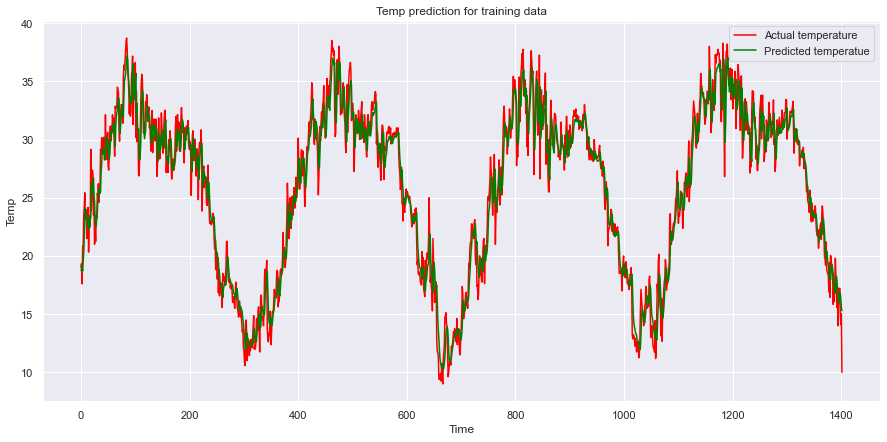

In [15]:
#plotting prediction for training data
plt.figure(figsize = (15, 7))
plt.plot(Ytrain_act, color = 'red', label = 'Actual temperature')
plt.plot(Ytrain_pred, color = 'green', label = 'Predicted temperatue')
plt.title('Temp prediction for training data')
plt.xlabel('Time')
plt.ylabel('Temp')
plt.legend()
plt.show()

In [16]:
r2_score(Ytrain_act, Ytrain_pred)

0.94508666903516

# Loading & preprocessing the testing data

In [26]:
df_test = pd.read_csv('DailyDelhiClimateTest.csv')
df_test

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333
...,...,...,...,...,...
109,2017-04-20,34.500000,27.500000,5.562500,998.625000
110,2017-04-21,34.250000,39.375000,6.962500,999.875000
111,2017-04-22,32.900000,40.900000,8.890000,1001.600000
112,2017-04-23,32.875000,27.500000,9.962500,1002.125000


In [27]:
Xtest = df_test['meantemp'].values

In [28]:
Xtest_sc = scaler.transform(Xtest.reshape(-1, 1))

In [29]:
Xtest_f = []

time_step = 60
for i in range(time_step, len(Xtest_sc)):
    Xtest_f.append(Xtest_sc[i - time_step: i, 0])
    
Xtest_f = np.array(Xtest_f)

In [30]:
Xtest_f = Xtest_f.reshape(Xtest_f.shape[0], Xtest_f.shape[1], 1)
Xtest_f.shape

(54, 60, 1)

# Predicting the testing data

In [31]:
Ypred = model.predict(Xtest_f)

2/2 [==============================] - 0s 23ms/step


In [32]:
Ypred = scaler.inverse_transform(Ypred)

In [33]:
Ytest = Xtest[time_step: ]

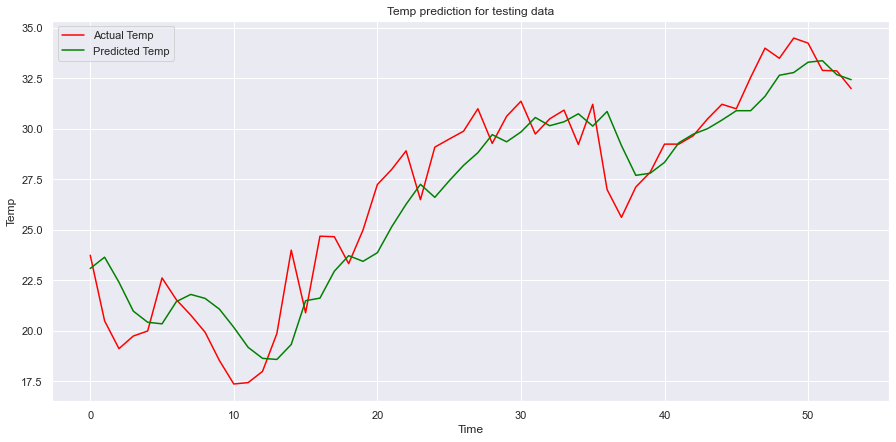

In [35]:
plt.figure(figsize = (15, 7))
plt.plot(Ytest, color = 'red', label = 'Actual Temp')
plt.plot(Ypred, color = 'green', label = 'Predicted Temp')
plt.title('Temp prediction for testing data')
plt.xlabel('Time')
plt.ylabel('Temp')
plt.legend()
plt.show()

In [36]:
r2_score(Ytest, Ypred)

0.8619493149439037